# Questions

In [1]:
"""
## General
- how many unique orders?
- how many unique customers?
- what are the segments?
- what is the date range of the orders?
- how many unique categories, sub_categories, products?

## Shipping
- frequency count of ship mode
- how long does it take for an order to ship

## Customer details
- avg number of orders
- avg order value per customer
- customer churn (more than a year since last order)

## Sales details
- Total sales by region
- Sales by category
- Sales by sub-category
- average sales amount by month
- total sales by year
- percent change in sales by year
- what are the top 5 selling items over all?
- what are the top 5 selling items per month?

"""

'\n## General\n- how many unique orders?\n- how many unique customers?\n- what are the segments?\n- what is the date range of the orders?\n- how many unique categories, sub_categories, products?\n\n## Shipping\n- frequency count of ship mode\n- how long does it take for an order to ship\n\n## Customer details\n- avg number of orders\n- avg order value per customer\n- customer churn (more than a year since last order)\n\n## Sales details\n- Total sales by region\n- Sales by category\n- Sales by sub-category\n- average sales amount by month\n- total sales by year\n- percent change in sales by year\n- what are the top 5 selling items over all?\n- what are the top 5 selling items per month?\n\nWhat are the forecasted sales? (next notebook)\n'

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [3]:
df = pd.read_csv('data/superstore_clean.csv', parse_dates=['order_date', 'ship_date'], dtype={'postal_code':'string'})

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   row_id         9800 non-null   int64         
 1   order_id       9800 non-null   object        
 2   order_date     9800 non-null   datetime64[ns]
 3   ship_date      9800 non-null   datetime64[ns]
 4   ship_mode      9800 non-null   object        
 5   customer_id    9800 non-null   object        
 6   customer_name  9800 non-null   object        
 7   segment        9800 non-null   object        
 8   country        9800 non-null   object        
 9   city           9800 non-null   object        
 10  state          9800 non-null   object        
 11  postal_code    9800 non-null   string        
 12  region         9800 non-null   object        
 13  product_id     9800 non-null   object        
 14  category       9800 non-null   object        
 15  sub_category   9800 n

In [5]:
df.head(5)

row_id        order_id order_date  ship_date       ship_mode customer_id  \
0       1  CA-2017-152156 2017-11-08 2017-11-11    Second Class    CG-12520   
1       2  CA-2017-152156 2017-11-08 2017-11-11    Second Class    CG-12520   
2       3  CA-2017-138688 2017-06-12 2017-06-16    Second Class    DV-13045   
3       4  US-2016-108966 2016-10-11 2016-10-18  Standard Class    SO-20335   
4       5  US-2016-108966 2016-10-11 2016-10-18  Standard Class    SO-20335   

     customer_name    segment        country             city       state  \
0      Claire Gute   Consumer  United States        Henderson    Kentucky   
1      Claire Gute   Consumer  United States        Henderson    Kentucky   
2  Darrin Van Huff  Corporate  United States      Los Angeles  California   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale     Florida   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale     Florida   

  postal_code region       product_id         category sub_category  \
0       42420  South  FUR-BO-10001798        Furniture    Bookcases   
1       42420  South  FUR-CH-10000454        Furniture       Chairs   
2       90036   West  OFF-LA-10000240  Office Supplies       Labels   
3       33311  South  FUR-TA-10000577        Furniture       Tables   
4       33311  South  OFF-ST-10000760  Office Supplies      Storage   

                                        product_name   sales  
0                  Bush Somerset Collection Bookcase  261.96  
1  Hon Deluxe Fabric Upholstered Stacking Chairs,...  731.94  
2  Self-Adhesive Address Labels for Typewriters b...   14.62  
3      Bretford CR4500 Series Slim Rectangular Table  957.58  
4                     Eldon Fold 'N Roll Cart System   22.37

## General
- how many unique orders?
- how many unique customers?
- what are the segments?
- what is the date range of the orders?
- how many unique categories, sub_categories, products?

In [6]:
# how many unique orders?
print("There are {} unique orders in this dataset.".format(df.order_id.nunique()))

There are 4922 unique orders in this dataset.


In [7]:
# how many unique customers?
print("There are {} unique customers in this dataset.".format(df.customer_id.nunique()))

There are 793 unique customers in this dataset.


In [8]:
#how many items were ordered? each line in the dataset is one item
print("{} items were ordered.".format(len(df)))

9800 items were ordered.


In [9]:
# what are the segments and how many are in each
# get users and segment, drop duplicates and then do value_counts and 
segs = df[['order_id', 'segment']].copy()
segs.drop_duplicates(inplace=True)
segs.head()

order_id    segment
0   CA-2017-152156   Consumer
2   CA-2017-138688  Corporate
3   US-2016-108966   Consumer
5   CA-2015-115812   Consumer
12  CA-2018-114412   Consumer

In [10]:
segs.segment.value_counts(normalize=True)

segment
Consumer       0.515441
Corporate      0.302926
Home Office    0.181633
Name: proportion, dtype: float64

Half of the orders were by the `Consumer` segment, `Corporate` accounts for 30% and and `Home Office` 18%.

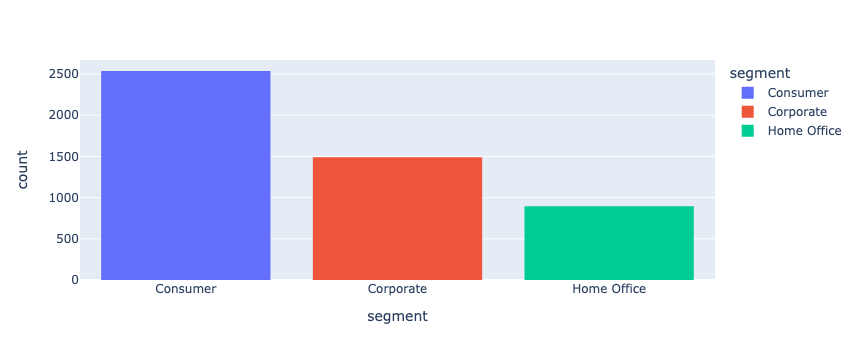

In [11]:
fig = px.histogram(segs, x='segment', color = 'segment')
fig.show()

In [12]:
#what is the date range of the orders?
print('The earliest order was made on {}.'.format(df.order_date.min()))

The earliest order was made on 2015-01-03 00:00:00.


In [13]:
print('The last order was made on {}.'.format(df.order_date.max()))

The last order was made on 2018-12-30 00:00:00.


In [14]:
#how many unique categories, sub-categories and products are there in the dataset?
for c in list(df['category'].unique()):
    df_temp = df[df['category'] == c]
    print(c)
    print(df_temp['sub_category'].unique())

Furniture
['Bookcases' 'Chairs' 'Tables' 'Furnishings']
Office Supplies
['Labels' 'Storage' 'Art' 'Binders' 'Appliances' 'Paper' 'Envelopes'
 'Fasteners' 'Supplies']
Technology
['Phones' 'Accessories' 'Machines' 'Copiers']


In [15]:
print('There are {} unique products in the dataset.'.format(df.product_id.nunique()))

There are 1861 unique products in the dataset.


In [16]:
df['category'].value_counts(dropna=False).index

Index(['Office Supplies', 'Furniture', 'Technology'], dtype='object', name='category')

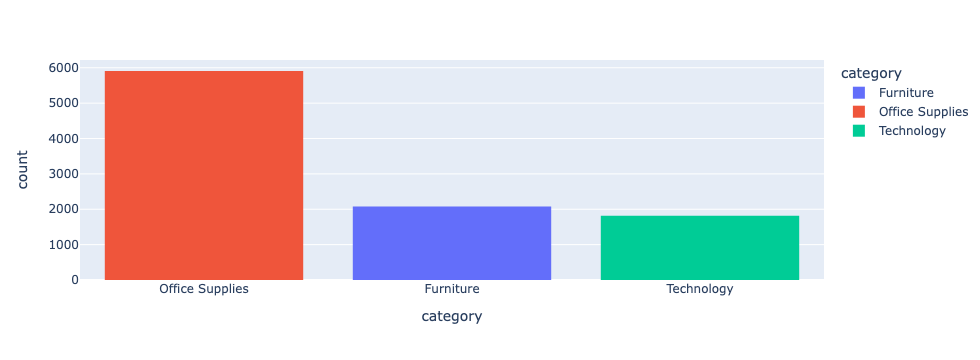

In [17]:
fig = px.histogram(df, x='category', color='category')
fig.update_xaxes(categoryorder='array', categoryarray=df['category'].value_counts(dropna=False).index)
fig.show()

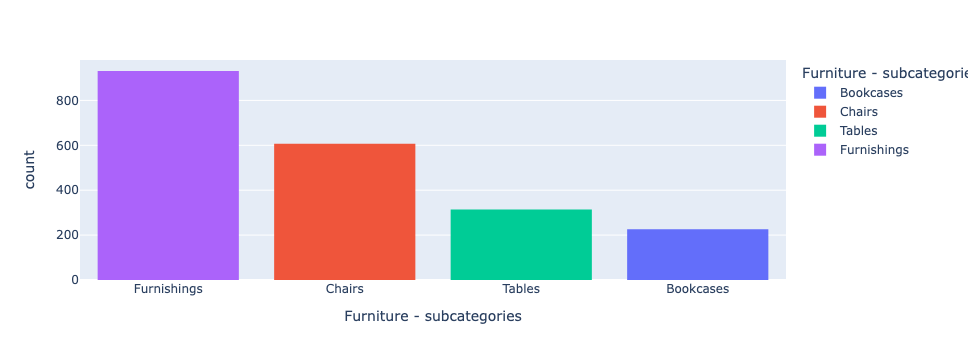

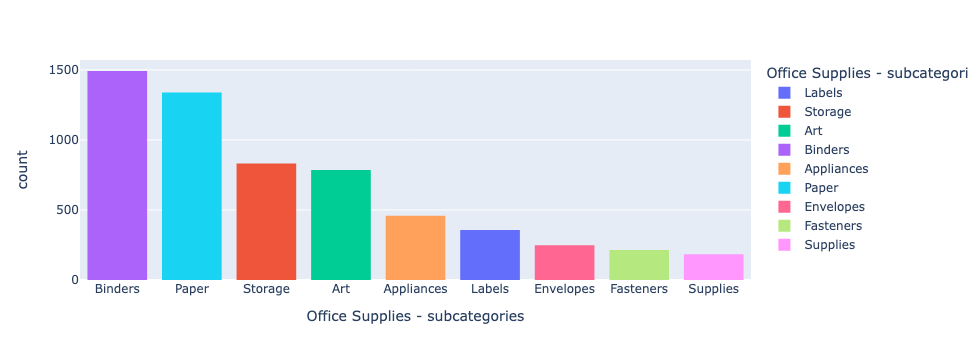

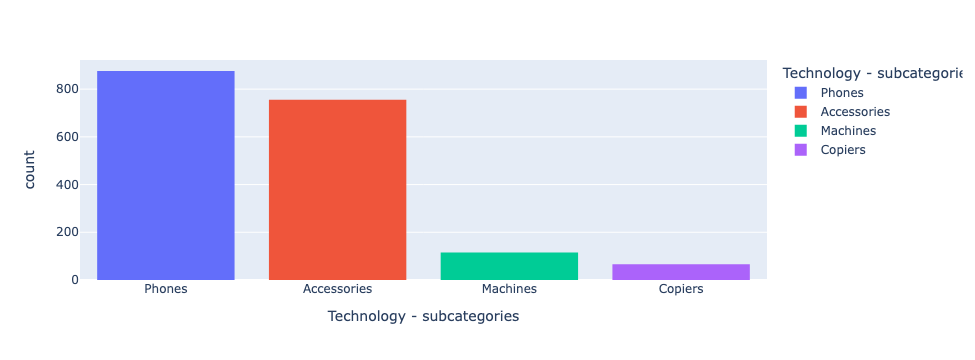

In [18]:
for c in list(df['category'].unique()):
    df_temp = df[df['category'] == c]
    fig = px.histogram(df_temp, x='sub_category', color='sub_category',
                      labels={'sub_category': '{} - subcategories'.format(c)})            
    fig.update_xaxes(categoryorder='array', categoryarray=df_temp['sub_category'].value_counts(dropna=False).index)
    fig.show()

## Shipping
- frequency count of ship mode
- how long does it take for an order to ship

In [19]:
# what are the ship modes and how many are in each
sh_mode = df[['order_id', 'ship_mode']].copy()
sh_mode.drop_duplicates(inplace=True)
sh_mode.head()

order_id       ship_mode
0   CA-2017-152156    Second Class
2   CA-2017-138688    Second Class
3   US-2016-108966  Standard Class
5   CA-2015-115812  Standard Class
12  CA-2018-114412  Standard Class

In [20]:
sh_mode.ship_mode.value_counts(normalize=True)

ship_mode
Standard Class    0.598334
Second Class      0.191792
First Class       0.156847
Same Day          0.053027
Name: proportion, dtype: float64

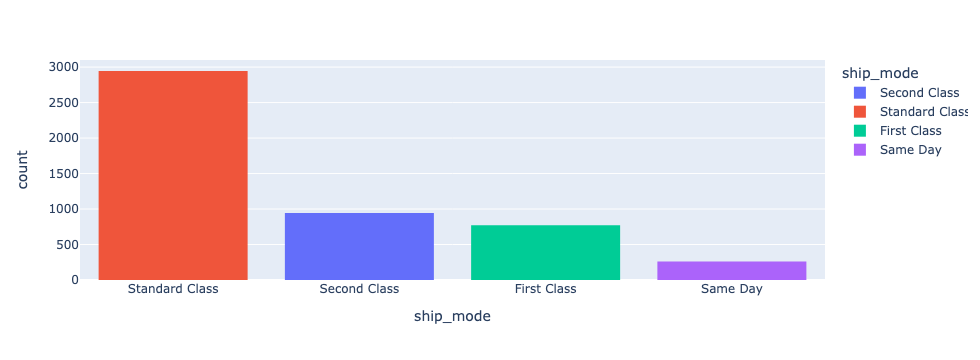

In [21]:
fig = px.histogram(sh_mode, x='ship_mode', color='ship_mode')
fig.update_xaxes(categoryorder='array', categoryarray=sh_mode.ship_mode.value_counts(dropna=False).index)
fig.show()

In [22]:
#how long does it take for an order to ship
ship_times = df[['order_id', 'order_date', 'ship_date']].copy()
ship_times.drop_duplicates(inplace=True)
ship_times.head()

order_id order_date  ship_date
0   CA-2017-152156 2017-11-08 2017-11-11
2   CA-2017-138688 2017-06-12 2017-06-16
3   US-2016-108966 2016-10-11 2016-10-18
5   CA-2015-115812 2015-06-09 2015-06-14
12  CA-2018-114412 2018-04-15 2018-04-20

In [23]:
ship_times['time_to_ship']=(ship_times['ship_date']-ship_times['order_date']).dt.days
ship_times.head()

order_id order_date  ship_date  time_to_ship
0   CA-2017-152156 2017-11-08 2017-11-11             3
2   CA-2017-138688 2017-06-12 2017-06-16             4
3   US-2016-108966 2016-10-11 2016-10-18             7
5   CA-2015-115812 2015-06-09 2015-06-14             5
12  CA-2018-114412 2018-04-15 2018-04-20             5

In [24]:
ship_times['time_to_ship'].mean().round()

4.0

In [25]:
ship_times.time_to_ship.value_counts()

time_to_ship
4    1378
5    1071
2     661
6     584
3     497
7     303
0     249
1     179
Name: count, dtype: int64

In [26]:
ship_list = list(ship_times['time_to_ship'].astype(str).unique())
ship_list.sort()
ship_list

['0', '1', '2', '3', '4', '5', '6', '7']

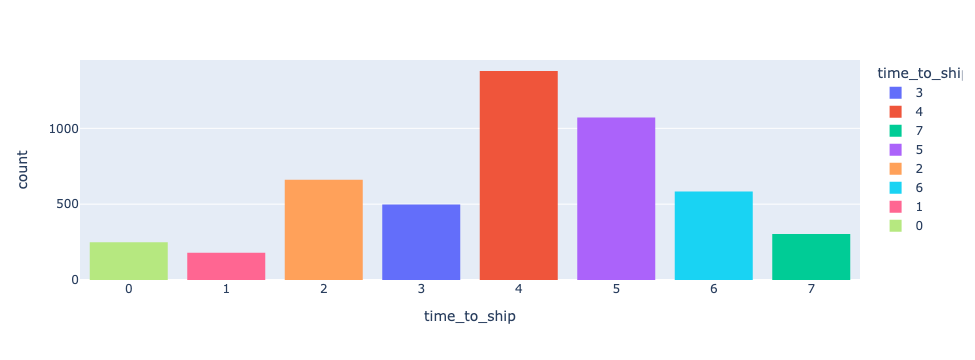

In [27]:
fig = px.histogram(ship_times, x='time_to_ship', color='time_to_ship')
fig.update_xaxes(categoryorder='array', categoryarray=ship_list)
fig.update_xaxes(type='category')
fig.show()

## Customer details
- avg number of orders
- avg order value customer
- customer churn (more than a year since last order)

In [28]:
#average number of orders per customer
group_orders_sales = df.groupby(['customer_id']).agg({'order_id':'count', 'sales':'sum'}).reset_index()
group_orders_sales.columns = ['customer_id', 'order_count', 'total_sales']
group_orders_sales

customer_id  order_count  total_sales
0      AA-10315           11      5563.56
1      AA-10375           15      1056.39
2      AA-10480           12      1790.51
3      AA-10645           18      5086.93
4      AB-10015            6       886.15
..          ...          ...          ...
788    XP-21865           28      2374.66
789    YC-21895            8      5454.35
790    YS-21880           12      6720.44
791    ZC-21910           31      8025.70
792    ZD-21925            9      1493.94

[793 rows x 3 columns]

In [29]:
print('The average number of orders per customer is {}'.format(group_orders_sales.order_count.mean().round(0)))

The average number of orders per customer is 12.0


In [30]:
print('The average total sales amount per customer is ${}'.format(group_orders_sales.total_sales.mean().round(2)))

The average total sales amount per customer is $2851.87


In [31]:
#how many customers have churned (no orders in the past year)
df.order_date.max()

Timestamp('2018-12-30 00:00:00')

The last order was made on 12/30/2018. Let's define customer churn as someone who didn't place an order in the past year. We'll use a year before this last order date as the time limit.

In [32]:
df.head(3)

row_id        order_id order_date  ship_date     ship_mode customer_id  \
0       1  CA-2017-152156 2017-11-08 2017-11-11  Second Class    CG-12520   
1       2  CA-2017-152156 2017-11-08 2017-11-11  Second Class    CG-12520   
2       3  CA-2017-138688 2017-06-12 2017-06-16  Second Class    DV-13045   

     customer_name    segment        country         city       state  \
0      Claire Gute   Consumer  United States    Henderson    Kentucky   
1      Claire Gute   Consumer  United States    Henderson    Kentucky   
2  Darrin Van Huff  Corporate  United States  Los Angeles  California   

  postal_code region       product_id         category sub_category  \
0       42420  South  FUR-BO-10001798        Furniture    Bookcases   
1       42420  South  FUR-CH-10000454        Furniture       Chairs   
2       90036   West  OFF-LA-10000240  Office Supplies       Labels   

                                        product_name   sales  
0                  Bush Somerset Collection Bookcase  261.96  
1  Hon Deluxe Fabric Upholstered Stacking Chairs,...  731.94  
2  Self-Adhesive Address Labels for Typewriters b...   14.62

In [33]:
churn_date = df.order_date.max()- pd.Timedelta(days=365) 
churn_date

Timestamp('2017-12-30 00:00:00')

In [34]:
#get last order date for each customer
churned = df.groupby('customer_id')[['order_date']].max().reset_index().rename(columns={'order_date':'last_order'})
churned

customer_id last_order
0      AA-10315 2018-06-29
1      AA-10375 2018-12-11
2      AA-10480 2018-04-15
3      AA-10645 2018-11-05
4      AB-10015 2017-11-10
..          ...        ...
788    XP-21865 2018-11-17
789    YC-21895 2018-12-26
790    YS-21880 2018-12-21
791    ZC-21910 2018-11-06
792    ZD-21925 2018-06-11

[793 rows x 2 columns]

In [35]:
# number of customers whose last order was before the churn date
ch_num = churned[churned['last_order']<churn_date]['customer_id'].nunique()
ch_num

102

In [36]:
# total number of customers
tot_num = df.customer_id.nunique()
tot_num

793

In [37]:
# percent churned
print('{}% of customers churned.'.format(round((ch_num/tot_num)*100, 2)))

12.86% of customers churned.


## Sales details
- Number of orders per resion
- Total sales by region
- Sales by category
- Sales by sub-category
- total sales by month
- total sales by year
- total sales year over year comparison
- what are the top 5 selling items over all?

In [38]:
df.head()

row_id        order_id order_date  ship_date       ship_mode customer_id  \
0       1  CA-2017-152156 2017-11-08 2017-11-11    Second Class    CG-12520   
1       2  CA-2017-152156 2017-11-08 2017-11-11    Second Class    CG-12520   
2       3  CA-2017-138688 2017-06-12 2017-06-16    Second Class    DV-13045   
3       4  US-2016-108966 2016-10-11 2016-10-18  Standard Class    SO-20335   
4       5  US-2016-108966 2016-10-11 2016-10-18  Standard Class    SO-20335   

     customer_name    segment        country             city       state  \
0      Claire Gute   Consumer  United States        Henderson    Kentucky   
1      Claire Gute   Consumer  United States        Henderson    Kentucky   
2  Darrin Van Huff  Corporate  United States      Los Angeles  California   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale     Florida   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale     Florida   

  postal_code region       product_id         category sub_category  \
0       42420  South  FUR-BO-10001798        Furniture    Bookcases   
1       42420  South  FUR-CH-10000454        Furniture       Chairs   
2       90036   West  OFF-LA-10000240  Office Supplies       Labels   
3       33311  South  FUR-TA-10000577        Furniture       Tables   
4       33311  South  OFF-ST-10000760  Office Supplies      Storage   

                                        product_name   sales  
0                  Bush Somerset Collection Bookcase  261.96  
1  Hon Deluxe Fabric Upholstered Stacking Chairs,...  731.94  
2  Self-Adhesive Address Labels for Typewriters b...   14.62  
3      Bretford CR4500 Series Slim Rectangular Table  957.58  
4                     Eldon Fold 'N Roll Cart System   22.37

In [39]:
#number of orders per region
num_orders_region = df[['order_id', 'region']].drop_duplicates()
num_orders_region = num_orders_region.groupby('region')[['order_id']].count().reset_index()
num_orders_region

region  order_id
0  Central      1156
1     East      1369
2    South       810
3     West      1587

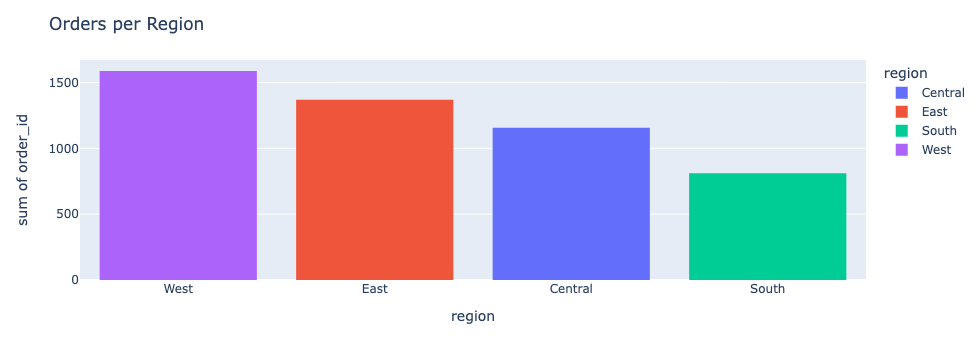

In [40]:
fig = px.histogram(num_orders_region, x='region', y='order_id', color='region')
fig.update_xaxes(categoryorder='array', categoryarray=(num_orders_region.sort_values(by='order_id', ascending=False)['region']))
fig.update_layout(title="Orders per Region")
fig.show()

In [41]:
# total sales by region
total_sales_region = df.groupby('region')[['sales']].sum().reset_index()
total_sales_region

region      sales
0  Central  492646.78
1     East  669518.79
2    South  389151.38
3     West  710219.60

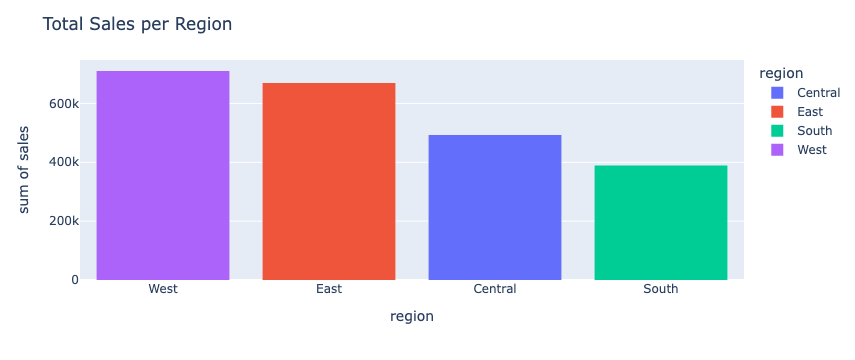

In [42]:
fig = px.histogram(total_sales_region, x='region', y='sales', color='region')
fig.update_xaxes(categoryorder='array', categoryarray=(total_sales_region.sort_values(by='sales', ascending=False)['region']))
fig.update_layout(title="Total Sales per Region")
fig.show()

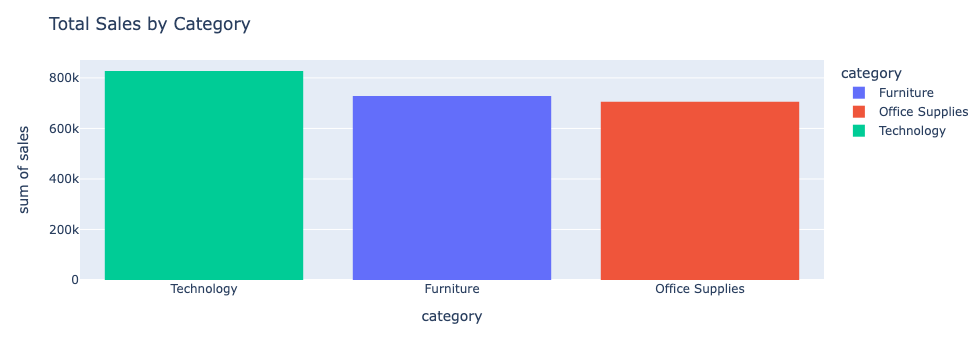

In [43]:
#sales by category
fig = px.histogram(df, x='category', y='sales', color='category').update_xaxes(categoryorder='total descending')
#fig.update_xaxes(categoryorder='array', categoryarray=(df.sort_values(by='sales', ascending=False)['category']))
fig.update_layout(title="Total Sales by Category")
fig.show()

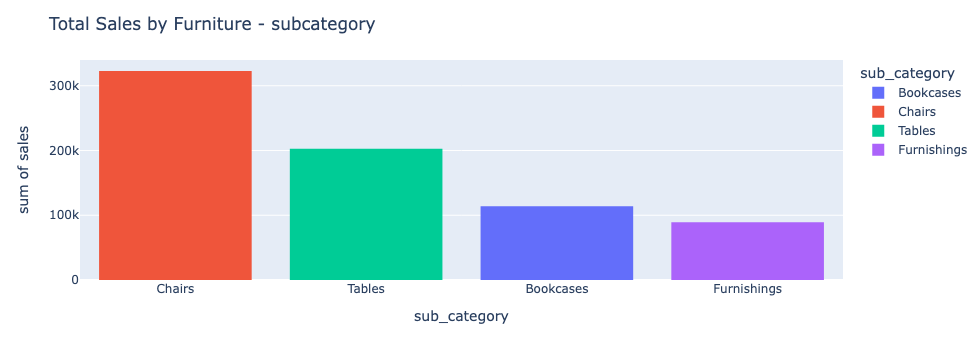

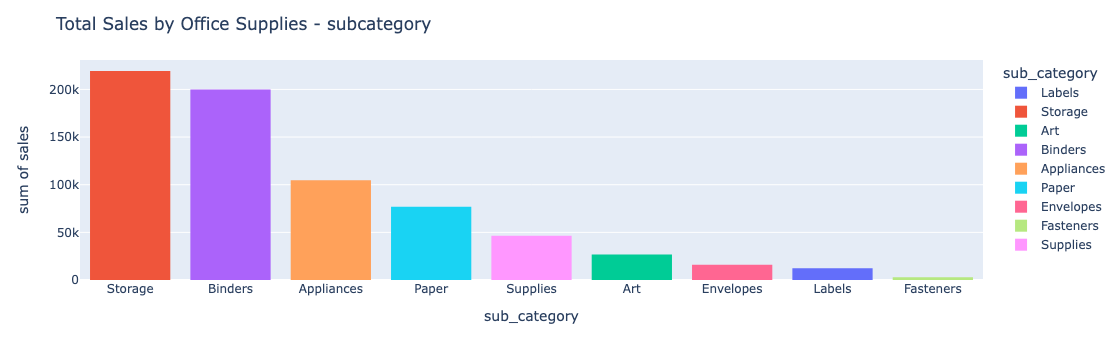

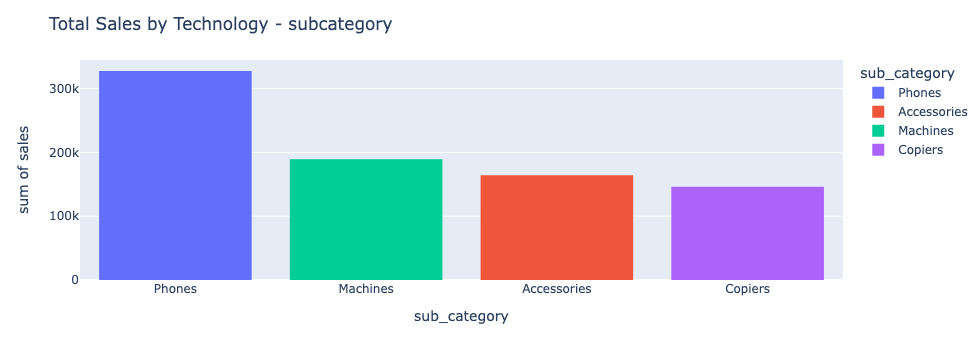

In [44]:
#sales by sub category
for c in list(df['category'].unique()):
    df_temp = df[df['category'] == c]
    fig = px.histogram(df_temp, x='sub_category', y='sales', color='sub_category').update_xaxes(categoryorder='total descending')
    fig.update_layout(title="Total Sales by {} - subcategory".format(c))
    fig.show()
    

In [45]:
#average sales by month
df.head(3)

row_id        order_id order_date  ship_date     ship_mode customer_id  \
0       1  CA-2017-152156 2017-11-08 2017-11-11  Second Class    CG-12520   
1       2  CA-2017-152156 2017-11-08 2017-11-11  Second Class    CG-12520   
2       3  CA-2017-138688 2017-06-12 2017-06-16  Second Class    DV-13045   

     customer_name    segment        country         city       state  \
0      Claire Gute   Consumer  United States    Henderson    Kentucky   
1      Claire Gute   Consumer  United States    Henderson    Kentucky   
2  Darrin Van Huff  Corporate  United States  Los Angeles  California   

  postal_code region       product_id         category sub_category  \
0       42420  South  FUR-BO-10001798        Furniture    Bookcases   
1       42420  South  FUR-CH-10000454        Furniture       Chairs   
2       90036   West  OFF-LA-10000240  Office Supplies       Labels   

                                        product_name   sales  
0                  Bush Somerset Collection Bookcase  261.96  
1  Hon Deluxe Fabric Upholstered Stacking Chairs,...  731.94  
2  Self-Adhesive Address Labels for Typewriters b...   14.62

In [60]:
#sales by month
mth_year = df.set_index('order_date')
mth_year.head(3)

row_id        order_id  ship_date     ship_mode customer_id  \
order_date                                                                
2017-11-08       1  CA-2017-152156 2017-11-11  Second Class    CG-12520   
2017-11-08       2  CA-2017-152156 2017-11-11  Second Class    CG-12520   
2017-06-12       3  CA-2017-138688 2017-06-16  Second Class    DV-13045   

              customer_name    segment        country         city  \
order_date                                                           
2017-11-08      Claire Gute   Consumer  United States    Henderson   
2017-11-08      Claire Gute   Consumer  United States    Henderson   
2017-06-12  Darrin Van Huff  Corporate  United States  Los Angeles   

                 state postal_code region       product_id         category  \
order_date                                                                    
2017-11-08    Kentucky       42420  South  FUR-BO-10001798        Furniture   
2017-11-08    Kentucky       42420  South  FUR-CH-10000454        Furniture   
2017-06-12  California       90036   West  OFF-LA-10000240  Office Supplies   

           sub_category                                       product_name  \
order_date                                                                   
2017-11-08    Bookcases                  Bush Somerset Collection Bookcase   
2017-11-08       Chairs  Hon Deluxe Fabric Upholstered Stacking Chairs,...   
2017-06-12       Labels  Self-Adhesive Address Labels for Typewriters b...   

             sales  
order_date          
2017-11-08  261.96  
2017-11-08  731.94  
2017-06-12   14.62

In [61]:
mth_year = mth_year.groupby(pd.Grouper(freq='M'))[['sales']].sum()
mth_year.head(3)

sales
order_date          
2015-01-31  14205.71
2015-02-28   4519.92
2015-03-31  55205.81

In [48]:
mth_year.asfreq('M')
mth_year = mth_year.sort_index()

In [49]:
mth_year.isna().sum()

sales    0
dtype: int64

/Users/deborahhaar/Dropbox/data_projects/superstore/superstore_venv/lib/python3.11/site-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



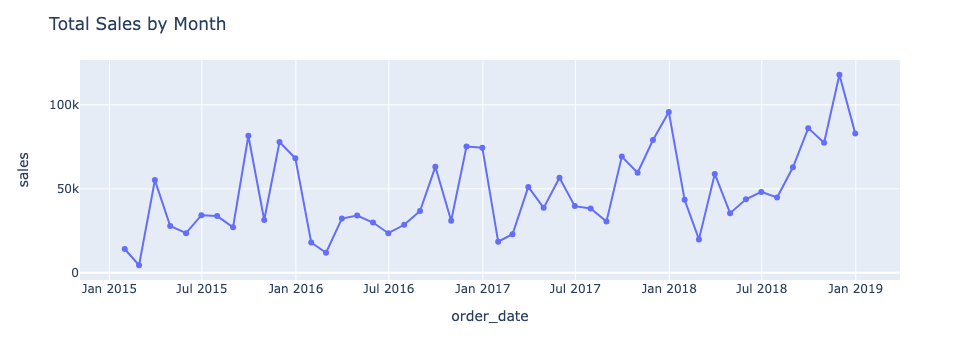

In [50]:
fig = px.line(mth_year, x=mth_year.index, y='sales', markers=True)
#fig.add_scatter(x=mth_year, y=df['ratio'])
fig.update_layout(title="Total Sales by Month")
fig.show()

In [51]:
#total sales by year
year = df.groupby(df.order_date.dt.year)[['sales']].sum().reset_index()
year

order_date      sales
0        2015  479856.18
1        2016  459435.87
2        2017  600192.68
3        2018  722051.82

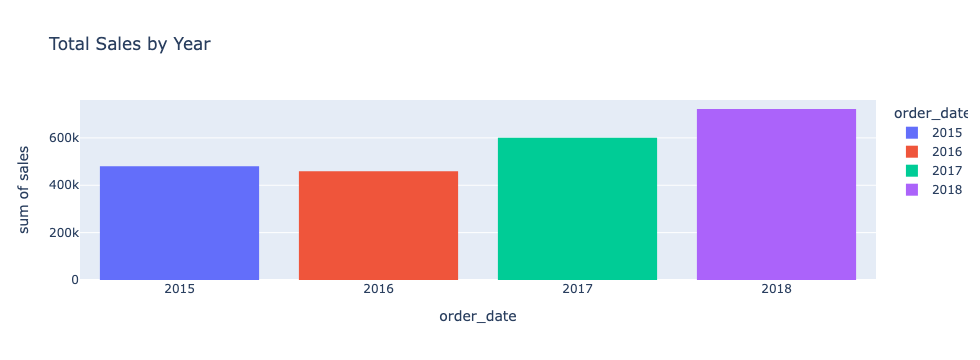

In [52]:
fig = px.histogram(year, x='order_date', y='sales', color='order_date', title="Total Sales by Year")
fig.update_xaxes(type='category')
fig.show()

In [53]:
#year over year comparison
year['pct_change'] = year['sales'].pct_change().round(3)*100
year

order_date      sales  pct_change
0        2015  479856.18         NaN
1        2016  459435.87        -4.3
2        2017  600192.68        30.6
3        2018  722051.82        20.3

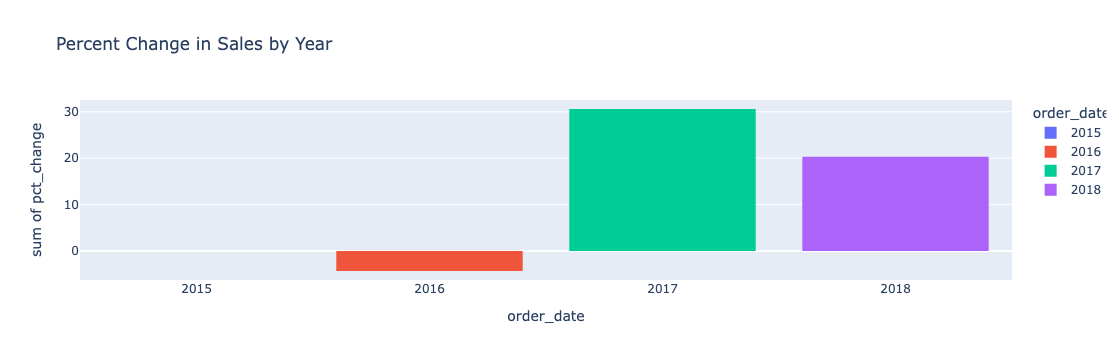

In [54]:
fig = px.histogram(year, x='order_date', y='pct_change', color='order_date', title="Percent Change in Sales by Year")
fig.update_xaxes(type='category')
fig.show()

In [55]:
#top 5 most sold items
top_5 = df.product_name.value_counts()[:5].to_frame().reset_index()
top_5

product_name  count
0          Staple envelope     47
1                  Staples     46
2        Easy-staple paper     44
3  Avery Non-Stick Binders     20
4  Staples in misc. colors     18

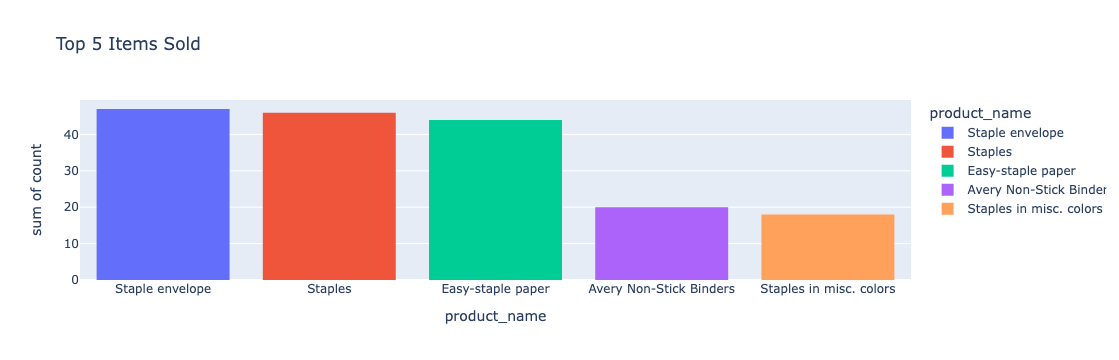

In [56]:
fig = px.histogram(top_5, x='product_name', y='count', color='product_name', title="Top 5 Items Sold")
fig.update_xaxes(type='category')
fig.show()